## <center>Exercises 1: Generation of pseudo-random numbers</center>

In this notebook we will use the given pseudo-random number generator for different purposes and generate pseudo-random numbers according to different probability distributions.

In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Exercise 1

In this exercise we are going to test the pseudo-random number generator we will use from now on. 
<br> To do so, we are going to generate $M=10^5$ random numbers and calculate their average using data blocking: this means that we are going to divide the $M$ throws into $N=100$ blocks of $L=1000$ each; in every block we are going to compute the average of the $L$ elements of the block and this will be our new measure; we will end up with $N$ measures and our result will be the average of these measures with the statistical uncertainty computed as their standard deviation. This procedure helps us estimate the uncertainties more precisely.
<br> For every quantity computed we are going to plot its value and uncertainty as a function of the number of blocks.

1. We are now going to compute $$\langle r \rangle = \int_0^1 r dr = 1/2$$ 
as explained above and plot the results as a function of the number of blocks.
<br> Looking at the figure below, which shows the difference between the results and the exact value of $\langle r \rangle$, we can notice that the generator used to sample random numbers works: in fact the estimation of $\langle r \rangle$ gives us results that are very similar to the exact value of the integral, within the errorbars.

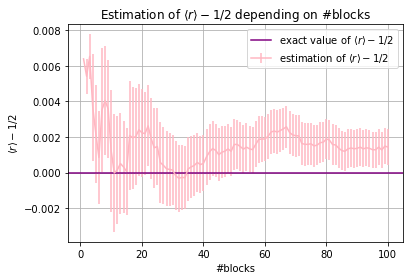

In [3]:
nblocks, mean, error = np.loadtxt("./ex_1/Output/part1.out", usecols=(0,1,2), delimiter=None, unpack='true')
plt.errorbar(nblocks,mean-0.5,yerr=error,color='lightpink',label=r'estimation of $\langle r \rangle -1/2$')
plt.axhline(y=0,color='purple',label=r'exact value of $\langle r \rangle -1/2$')
plt.xlabel('#blocks')
plt.ylabel(r'$\langle r \rangle -1/2$')
plt.title(r'Estimation of $\langle r \rangle -1/2$ depending on #blocks')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


2. We can proceed in the same way to compute $$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$$
where, instead of evaluating $r$ for each throw, we are going to evaluate $(r-1/2)^2$ and treat the data with data blocking.
<br> In the picture below we are showing the difference of the results with the exact value of $\sigma^2$ as a function of the number of blocks; again we can say that the generator works well.

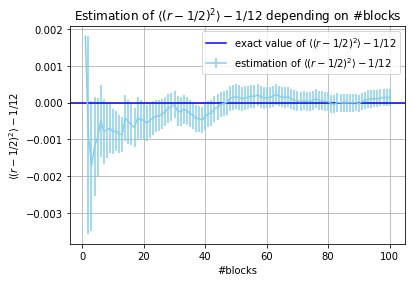

In [4]:
nblocks, mean, error = np.loadtxt("./ex_1/Output/part2.out", usecols=(0,1,2), delimiter=None, unpack='true')
plt.errorbar(nblocks,mean-1./12.,yerr=error,color='skyblue',label=r'estimation of $\langle (r-1/2)^2 \rangle -1/12$')
plt.axhline(y=0,color='blue',label=r'exact value of $\langle (r-1/2)^2 \rangle -1/12$')
plt.xlabel('#blocks')
plt.ylabel(r'$\langle (r-1/2)^2 \rangle -1/12$')
plt.title(r'Estimation of $\langle (r-1/2)^2 \rangle -1/12$ depending on #blocks')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


To conclude we are going to divide $[0,1]$ into $M=100$ sub-intervals and do the $\chi^2$ test.
<br> We now have to throw the random dice in $[0,1]$ $10^4$ times, obtaining $10^4$ random numbers and counting the number $n_i$ of throws in each sub-interval; then we can compute the first measure of the $\chi^2$ with
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
where $n/M$ is the expected number of events in each sub-interval.
<br> We can follow this procedure again in order to get more measures of the $\chi^2$; we will stop when we reach $100$ measures. 
<br> Below we are plotting the histogram of the measures obtained; we would expect this probability distribution to be $\approx 100$ (and on average it is near that value), but even if it is not flat this is a good shape, as the fit with the exact curve indicates.

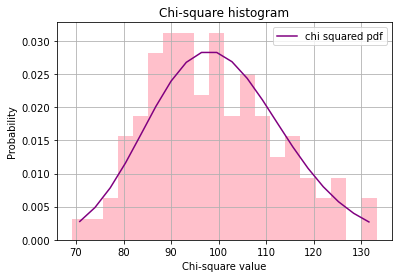

In [7]:
from scipy.special import gamma
from scipy.stats import chi2
from scipy.optimize import curve_fit

chi_square = np.loadtxt("./ex_1/Output/part3.out", usecols=(1), delimiter=None, unpack='true')
n_bins = 20

n, bins, patches = plt.hist(chi_square,n_bins,density=True,color='pink')        # density=True returns the normalized histogram
bincenters = 0.5*(bins[1:]+bins[:-1])  # using the centres of the bins as x data

y_exact = chi2.pdf(bincenters,100)        # k=100 because each chi-squared is the sum of M=100 independent variables
plt.plot(bincenters,y_exact,color='purple',label='chi squared pdf')
plt.xlabel('Chi-square value')
plt.ylabel('Probability')
plt.title('Chi-square histogram')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

### Exercise 2

We are now going to use the pseudo-random number generator to check the central limit theorem.
<br> We are going to compute $10^4$ evaluations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ with $x_i$ being random variables following a certain probability distribution. We are going to sample $x_i$ from a uniform distribution, an exponential distribution (with $\lambda=1$) and a lorentzian distribution (with $\mu=0$ and $\Gamma=1$); what we should see is that the more we increase $N$ the more the distribution of $S_N$ resembles a gaussian in the first two cases and a Cauchy-Lorentz distribution in the last case. For the sampling of $x_i$ I have added two methods to the pseudo-random number generator: one for sampling an exponential distribution and one for sampling a lorentzian distribution, both obtained with the inversion of the cumulative function. We will look at the evolution of the distribution of $S_N$ by following this procedure for $N=1,2,10,100$.
<br> The figures below show the evolution of our results.

In [8]:
# reading all data

std_1, exp_1, lor_1 = np.loadtxt("./ex_2/Output/plot_1.out", usecols=(0,1,2), delimiter=None, unpack='true')
std_2, exp_2, lor_2 = np.loadtxt("./ex_2/Output/plot_2.out", usecols=(0,1,2), delimiter=None, unpack='true')
std_10, exp_10, lor_10 = np.loadtxt("./ex_2/Output/plot_10.out", usecols=(0,1,2), delimiter=None, unpack='true')
std_100, exp_100, lor_100 = np.loadtxt("./ex_2/Output/plot_100.out", usecols=(0,1,2), delimiter=None, unpack='true')

n_bins = 100

- $N=1$:

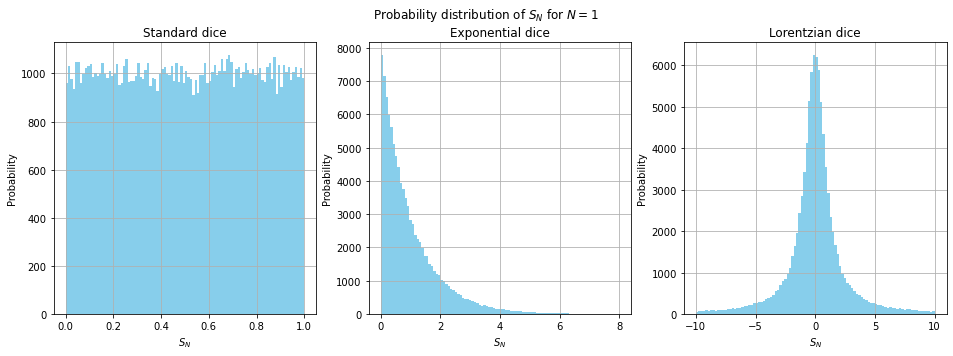

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle(r'Probability distribution of $S_N$ for $N=1$')

n, bins, patches = ax1.hist(std_1,n_bins,color='skyblue')
ax1.set_xlabel('$S_N$')
ax1.set_ylabel('Probability')
ax1.set_title('Standard dice')
ax1.grid(True)

n, bins, patches = ax2.hist(exp_1,n_bins,range=(0.,8.),color='skyblue')
ax2.set_xlabel('$S_N$')
ax2.set_ylabel('Probability')
ax2.set_title('Exponential dice')
ax2.grid(True)

n, bins, patches = ax3.hist(lor_1,n_bins,range=(-10.,10.),color='skyblue')
ax3.set_xlabel('$S_N$')
ax3.set_ylabel('Probability')
ax3.set_title('Lorentzian dice')
ax3.grid(True)

plt.show()

- $N=2$:

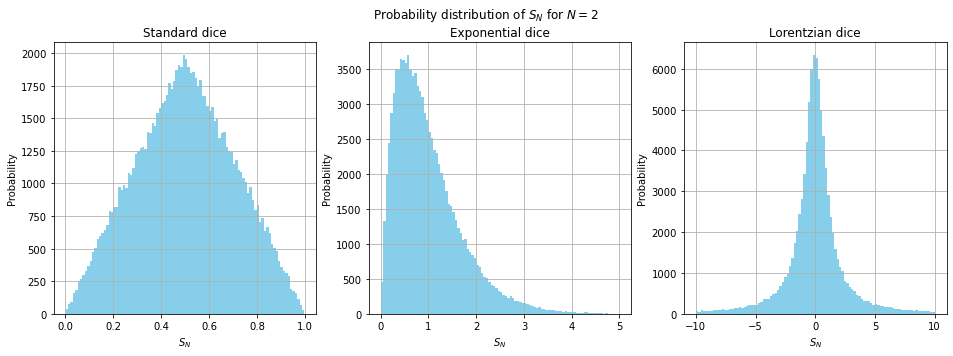

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle(r'Probability distribution of $S_N$ for $N=2$')

n, bins, patches = ax1.hist(std_2,n_bins,color='skyblue')
ax1.set_xlabel('$S_N$')
ax1.set_ylabel('Probability')
ax1.set_title('Standard dice')
ax1.grid(True)

n, bins, patches = ax2.hist(exp_2,n_bins,range=(0.,5.),color='skyblue')
ax2.set_xlabel('$S_N$')
ax2.set_ylabel('Probability')
ax2.set_title('Exponential dice')
ax2.grid(True)

n, bins, patches = ax3.hist(lor_2,n_bins,range=(-10.,10.),color='skyblue')
ax3.set_xlabel('$S_N$')
ax3.set_ylabel('Probability')
ax3.set_title('Lorentzian dice')
ax3.grid(True)

plt.show()

- $N=10$:

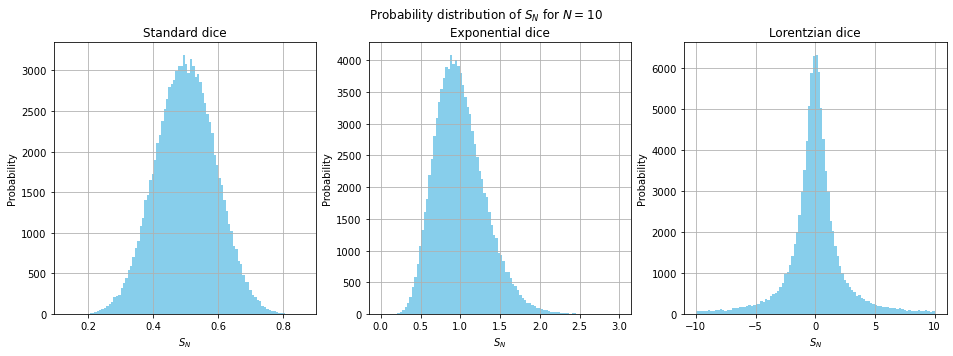

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle(r'Probability distribution of $S_N$ for $N=10$')

n, bins, patches = ax1.hist(std_10,n_bins,color='skyblue')
ax1.set_xlabel('$S_N$')
ax1.set_ylabel('Probability')
ax1.set_title('Standard dice')
ax1.grid(True)

n, bins, patches = ax2.hist(exp_10,n_bins,range=(0.,3.),color='skyblue')
ax2.set_xlabel('$S_N$')
ax2.set_ylabel('Probability')
ax2.set_title('Exponential dice')
ax2.grid(True)

n, bins, patches = ax3.hist(lor_10,n_bins,range=(-10.,10.),color='skyblue')
ax3.set_xlabel('$S_N$')
ax3.set_ylabel('Probability')
ax3.set_title('Lorentzian dice')
ax3.grid(True)

plt.show()

- $N=100$:

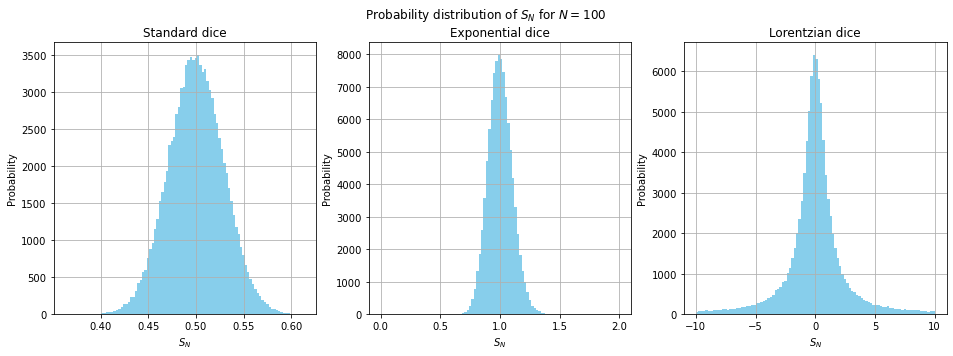

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle(r'Probability distribution of $S_N$ for $N=100$')

n, bins, patches = ax1.hist(std_100,n_bins,color='skyblue')
ax1.set_xlabel('$S_N$')
ax1.set_ylabel('Probability')
ax1.set_title('Standard dice')
ax1.grid(True)

n, bins, patches = ax2.hist(exp_100,n_bins,range=(0.,2.),color='skyblue')
ax2.set_xlabel('$S_N$')
ax2.set_ylabel('Probability')
ax2.set_title('Exponential dice')
ax2.grid(True)

n, bins, patches = ax3.hist(lor_100,n_bins,range=(-10.,10.),color='skyblue')
ax3.set_xlabel('$S_N$')
ax3.set_ylabel('Probability')
ax3.set_title('Lorentzian dice')
ax3.grid(True)

plt.show()

We can conclude that we have checked the central limit theorem: the more we increase the number of random numbers taking part to the sum $S_N$ the more the histograms become similar to the histogram of a gaussian distribution for the standard and the exponential dice and to the one of a Cauchy-Lorentz distribution for the lorentzian dice. 
<br> To see this more clearly, we can fit the histograms for the maximum number of $N$ (that is $100$) with the exact distributions they should resemble.

optimized parameters for standard dice [mean,sigma] =
[0.50002119 0.02891713]
optimized parameters for exponential dice [mean,sigma] =
[0.99533384 0.09975173]
optimized parameters for lorentzian dice [mean,gamma] =
[0.00370222 0.9314901 ]


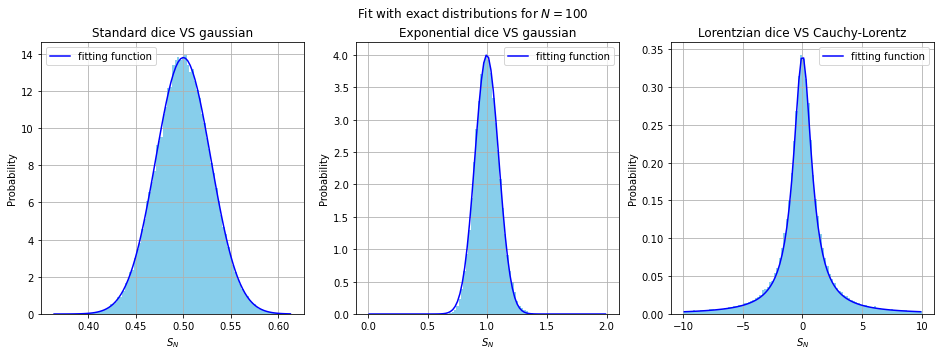

In [13]:
from scipy.optimize import curve_fit
from math import pi
from math import sqrt


def gauss(x,mu,sigma):  # defining the fitting function for std and exp: gaussian
    return 1 / sqrt(2*pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))

def lorentz(x,mu,gamma):  # defining the fitting function for lor: lorentzian
    return 1 / pi * gamma / ( (x-mu)**2 + gamma**2 )


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle(r'Fit with exact distributions for $N=100$')

n, bins, patches = ax1.hist(std_100,n_bins,density='True',color='skyblue')
bincenters = 0.5*(bins[1:]+bins[:-1])  #using the centres of the bins as x data
p_opt, p_cov = curve_fit(gauss,bincenters,n)
print("optimized parameters for standard dice [mean,sigma] =")
print(p_opt)
y_fit = gauss(bincenters,p_opt[0],p_opt[1])
ax1.plot(bincenters,y_fit,color='blue',label='fitting function') 
ax1.set_xlabel('$S_N$')
ax1.set_ylabel('Probability')
ax1.set_title('Standard dice VS gaussian')
ax1.legend(loc='best')
ax1.grid(True)

n, bins, patches = ax2.hist(exp_100,n_bins,density='True',range=(0.,2.),color='skyblue')
bincenters = 0.5*(bins[1:]+bins[:-1])  #using the centres of the bins as x data
p_opt, p_cov = curve_fit(gauss,bincenters,n)
print("optimized parameters for exponential dice [mean,sigma] =")
print(p_opt)
y_fit = gauss(bincenters,p_opt[0],p_opt[1])
ax2.plot(bincenters,y_fit,color='blue',label='fitting function') 
ax2.set_xlabel('$S_N$')
ax2.set_ylabel('Probability')
ax2.set_title('Exponential dice VS gaussian')
ax2.legend(loc='best')
ax2.grid(True)


n, bins, patches = ax3.hist(lor_100,n_bins,density='True',range=(-10.,10.),color='skyblue')
bincenters = 0.5*(bins[1:]+bins[:-1])  #using the centres of the bins as x data
p_opt, p_cov = curve_fit(lorentz,bincenters,n)
print("optimized parameters for lorentzian dice [mean,gamma] =")
print(p_opt)
y_fit = lorentz(bincenters,p_opt[0],p_opt[1])
ax3.plot(bincenters,y_fit,color='blue',label='fitting function') 
ax3.set_xlabel('$S_N$')
ax3.set_ylabel('Probability')
ax3.set_title('Lorentzian dice VS Cauchy-Lorentz')
ax3.legend(loc='best')
ax3.grid(True)

The evolution of the distribution of $S_N$ towards the exact distributions is shown in the figure below, which represents all the histograms in the same graph.

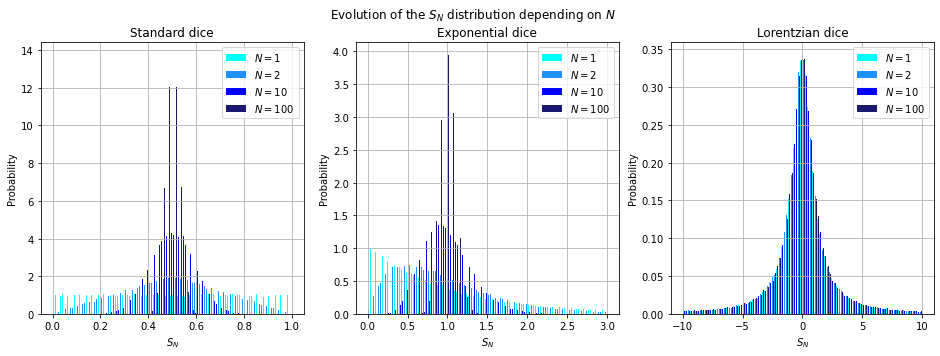

In [14]:
# all graphs together

x = [std_1, std_2, std_10, std_100]
y = [exp_1, exp_2, exp_10, exp_100]
z = [lor_1, lor_2, lor_10, lor_100]

labels = ['$N = 1$', '$N = 2$', '$N = 10$', '$N = 100$']
#colors = ['mistyrose','lightsalmon','tomato','firebrick']
colors = ['aqua','dodgerblue','blue','midnightblue']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle(r'Evolution of the $S_N$ distribution depending on $N$')

n, bins, patches = ax1.hist(x, n_bins, range=(0.,1.), density=True, histtype='bar', stacked=False, fill=True, color=colors,label=labels)
ax1.set_xlabel('$S_N$')
ax1.set_ylabel('Probability')
ax1.set_title('Standard dice')
ax1.legend(loc='best')
ax1.grid(True)

n, bins, patches = ax2.hist(y, n_bins, range=(0.,3.), density=True, histtype='bar', stacked=False, fill=True, color=colors,label=labels)
ax2.set_xlabel('$S_N$')
ax2.set_ylabel('Probability')
ax2.set_title('Exponential dice')
ax2.legend(loc='best')
ax2.grid(True)

n, bins, patches = ax3.hist(z, n_bins, range=(-10.,10.), density=True, histtype='bar', stacked=False, fill=True, color=colors,label=labels)
ax3.set_xlabel('$S_N$')
ax3.set_ylabel('Probability')
ax3.set_title('Lorentzian dice')
ax3.legend(loc='best')
ax3.grid(True)

plt.show()

### Exercise 3

In this final exercise we will simulate Buffon's experiment, which consists in throwing a needle of length $L$ randomly on a horizontal plane ruled with straight lines at distance $d$ from each other, with $d>L$; the needle has a probability $P = 2L/\pi d$ of intersecting one of the lines. 
<br> We can use this probability to evaluate $\pi$ after throwing the needle many times: in fact, if we throw the needle $N_{thr}$ times and we see it landing on a line $N_{hit}$ of those times, we can estimate $\pi$ from the experimental computation of the probability $P$:
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$ 
Therefore we are going to throw the needle randomly $N_{thr}$ times, count the number $N_{hit}$ of times we spot an intersection with a line and compute $\pi$: we are going to repeat this $M=10^5$ times and divide these evaluations of $\pi$ into $N=100$ blocks of $L=1000$ steps each, performing data blocking.
<br> Below we are plotting the estimation of $\pi$ and its uncertainty resulting from the simulation as a function of the number of blocks: even though the results of the simulation are higher than the exact value of $\pi$ (it does not lay within the errorbars of the estimation), I think this is a good result considering the way these estimations have been done.

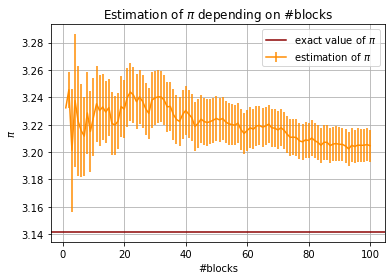

In [4]:
nblocks, mean, error = np.loadtxt("./ex_3/Output/pi.out", usecols=(0,1,2), delimiter=None, unpack='true')
pi = 3.14159
plt.errorbar(nblocks,mean,yerr=error,color='darkorange',label=r'estimation of $\pi$')
plt.axhline(y=pi,color='darkred',label=r'exact value of $\pi$')
plt.xlabel('#blocks')
plt.ylabel(r'$\pi$')
plt.title(r'Estimation of $\pi$ depending on #blocks')
plt.legend(loc='best')
plt.grid(True)
plt.show()